# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv('/Users/herrhellana/Documents/_Maths&Data analysis/Data mining spring 2018/Homeworks/table_data.csv')

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import random

In [7]:
random.seed(1234)
le = LabelEncoder()
y = le.fit(table_data['species']).transform(table_data['species'])

In [8]:
X = np.matrix(table_data.iloc[:, 2:])

In [9]:
random.seed(1234)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
index = sss.split(X, y)

In [10]:
train_idx = []
test_idx = []

for train_index, test_index in index:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_idx.extend(train_index)
    test_idx.extend(test_index)

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [11]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread('/Users/herrhellana/Documents/_Maths&Data analysis/Data mining spring 2018/Homeworks/images/33.jpg')

(357, 700)


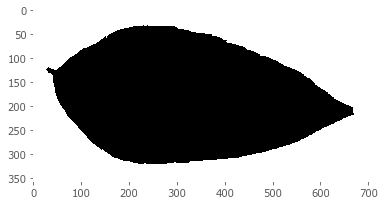

In [12]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [13]:
from scipy.misc import imresize

In [14]:
img_resized = imresize(img, (100, 100))

/Users/herrhellana/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


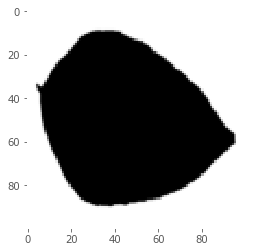

In [15]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только те картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [16]:
images = np.empty((1584, 10000))

In [17]:
for i in range(1, 1585):
    filepath = os.path.join(IMG_DIR, '{}.jpg'.format(i))
    img = plt.imread('/Users/herrhellana/Documents/_Maths&Data analysis/Data mining spring 2018/Homeworks/images/{}.jpg'.format(i))
    img = np.ravel(imresize(img, (100, 100)))
    images[i-1, :] = img

/Users/herrhellana/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [18]:
imgs_train = images[train_idx]
imgs_test = images[test_idx]

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

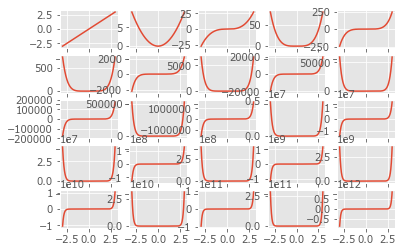

In [19]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

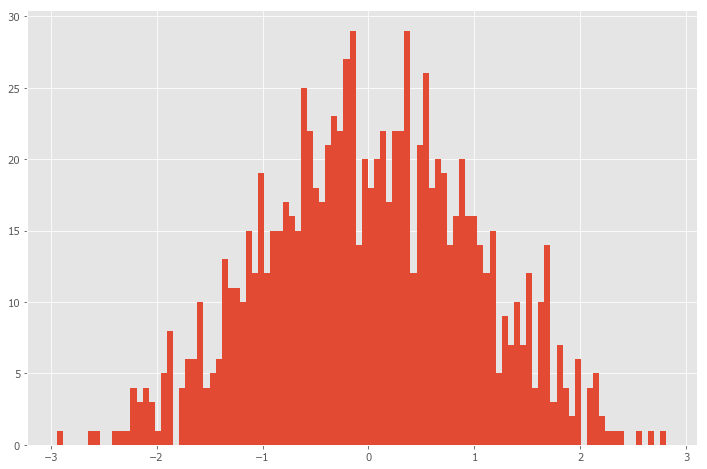

In [214]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

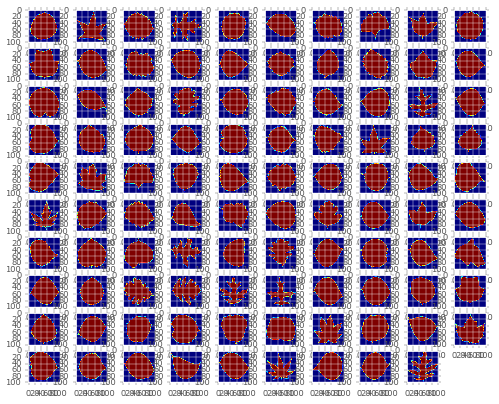

In [127]:
fig = plt.figure(figsize=(10, 8), dpi = 60)
for i in range(1, 100): 
    plt.subplot(10, 10, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.imshow(np.reshape(imgs_train[i], (100, 100)))
    # plt.axis("off") # отключить оси, получится просто 25 линий

In [120]:
# choose randomly 100 column indices 
indices = np.random.randint(0, imgs_train.shape[1], 100)

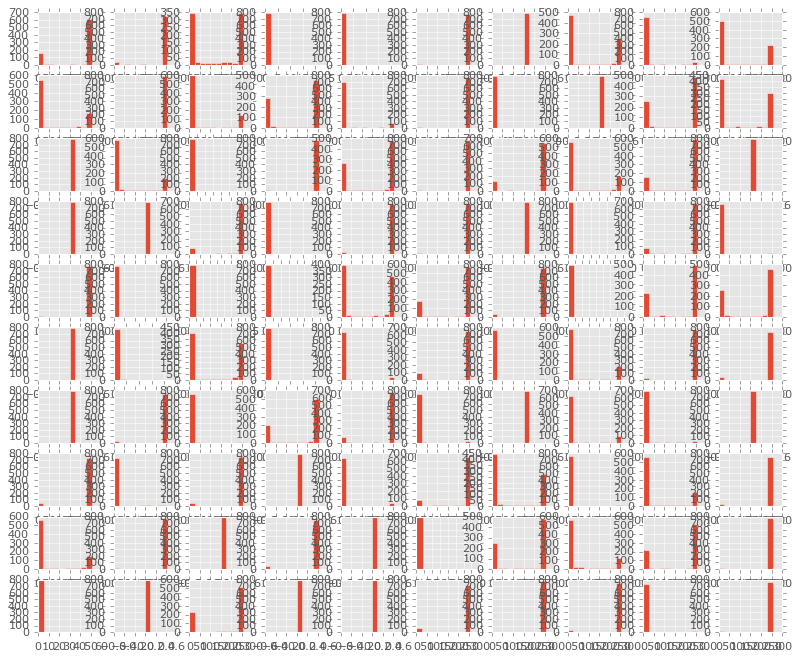

In [128]:
# гистограмма строится по одномерной выборке - вектору чисел
fig = plt.figure(figsize=(12, 10), dpi = 80)
for i in range(1, 101): 
    plt.subplot(10, 10, i)
    _ = plt.hist(imgs_train[:, indices[i-1]], bins=10) 

#### Красивый средний лист

In [122]:
average_leaf = imgs_train.mean(axis=0)

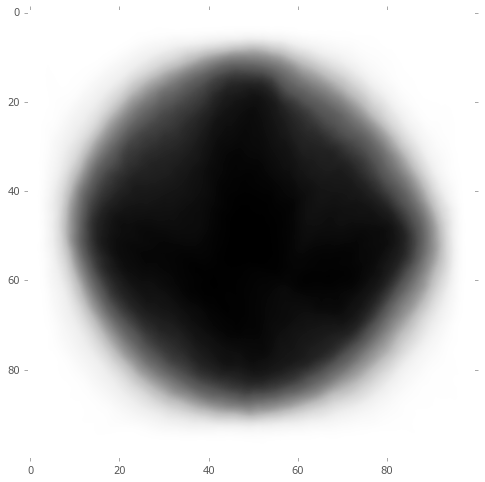

In [129]:
plt.imshow(np.reshape(average_leaf, (100, 100)), cmap='Greys')
plt.grid(None)

#### Инфернальный "разбросочный" лист

In [124]:
variance_leaf = np.std(imgs_train, axis=0)

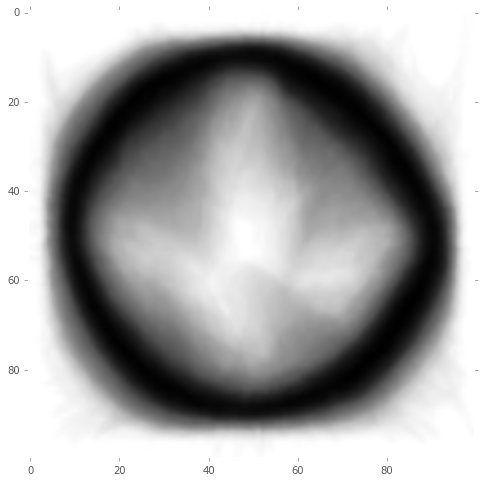

In [130]:
plt.imshow(np.reshape(variance_leaf, (100, 100)), cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

__Ответы__:
* Отличить листья визуально достаточно сложно, так как картинки представлены в сжатом виде. Некоторые листы (особенно овальной/круглой формы) кажутся одинаковыми, хотя в действительности они отличаются (например, крутизной изгиба листа). Можно выделить две основные группы: сглаженные и резные листы. Далее можно выделять подгруппы в зависимости от наклона листа, но визуально сделать это уже проблематично. 

In [350]:
np.amax(imgs_test)

255.0

In [352]:
np.amin(imgs_test)

0.0

In [372]:
np.unique(imgs_test)

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

* min value = 0, max value = 255. Множество значений выведено выше, $\in [0, 255]$. 

In [27]:
unique, counts = np.unique(np.ravel(imgs_test), return_counts=True)

In [28]:
counts

array([983387,   5269,   3203,   2338,   1971,   1705,   1491,   1307,
         1279,   1093,   1150,    950,    875,    861,    800,    828,
          785,    772,    736,    690,    701,    608,    620,    626,
          612,    581,    560,    541,    505,    518,    533,    511,
          509,    532,    511,    472,    487,    478,    473,    460,
          447,    453,    438,    420,    401,    394,    404,    384,
          409,    414,    397,    401,    349,    346,    395,    386,
          393,    389,    378,    344,    349,    354,    333,    342,
          344,    378,    301,    355,    328,    299,    338,    317,
          346,    331,    322,    296,    290,    321,    302,    307,
          291,    293,    290,    260,    304,    325,    302,    320,
          262,    251,    279,    297,    311,    271,    295,    279,
          295,    295,    299,    264,    254,    293,    260,    282,
          297,    272,    262,    256,    272,    282,    265,    280,
      

In [29]:
print(unique[0], unique[-1])

0.0 255.0


* Видим, что первое и второе самое часто встречающееся значение (выведены в списке counts) -- первый и последний элемент в списке unique: 0 и 255 соответственно. То же наблюдаем и на гистограмме выше. Столбцы по краям (у значений 0 и 255) наиболее высокие для каждой картинки, то есть эти пиксели встречаются чаще всего. 
* Однако, распределение признаков для объектов очень разное, что также показано на гистаграмме. P.S.: Все рапределения, похоже, относятся к семейсту двухпараметрического бета-распределения. 

* Бинаризировать можно, взяв к примеру, в качестве порога значения 0 и 255. Например, 0 оставить нулем, 255 -- заменить единичками. 

* Средний лист не особо похож на обычный лист. Тем не менее, он больше походит на лист из визуально выделенного класса "сглаженных листов". Скорее всего это связано с простой причиной: "сглаженных" листов больше, чем резных. К тому же все листы имеют схожие округлые очертания (у сглаженных контур непрерывный, у резных -- прерывистый). Константных пикселей много, в этом можно убедиться, посмотрев на плотность выведенных выше изображений "среднего" и "разбросочного" листов. Все очень черные области у "среднего" и очень белые у "разбросочного" -- константные признаки. 

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [67]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [68]:
import matplotlib.cm as cm

In [69]:
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)

pca_X = pca.fit_transform(imgs_train)
sne_X = tsne.fit_transform(imgs_train)

### PCA

Визуализация всех 99 классов очень плохо читаемая (см график t-SNE ниже). Но после обучения на k-means (3 секция в работе) можно отчетливо увидеть группирование изначальных классов деревьев в кластеры. 

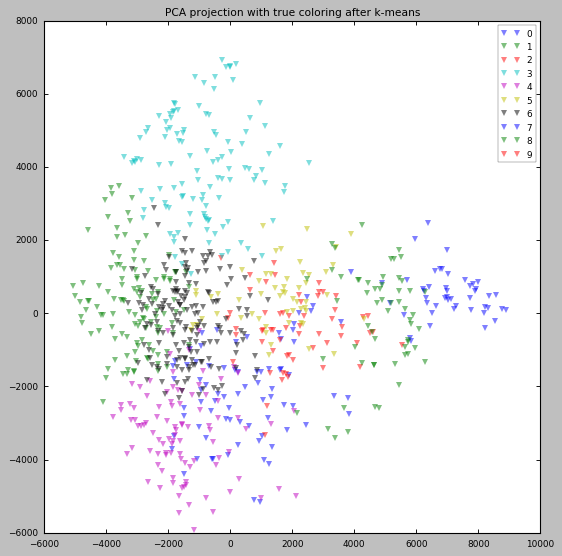

In [105]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = kmeans.labels_ == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with true coloring after k-means')
plt.show()

### t-SNE

t-SNE перед обучением k-means.

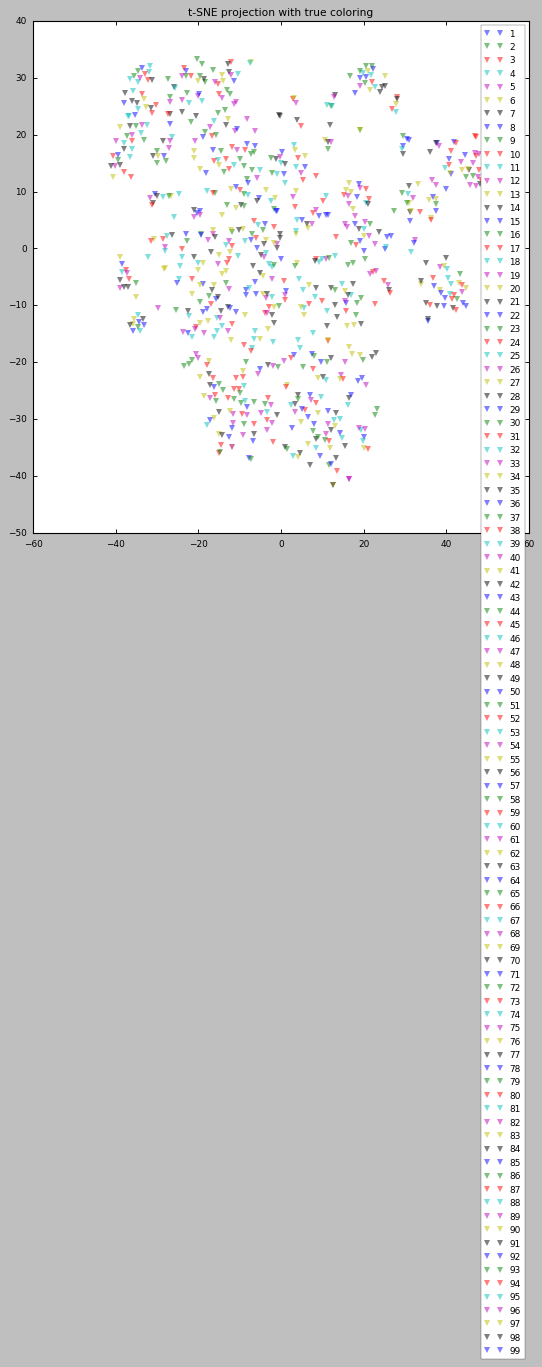

In [99]:
plt.figure(figsize=(8, 8))
for i in range(1, 100):
    bit_mask = y_train == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('t-SNE projection with true coloring')
plt.show()

t-SNE впосле k-means

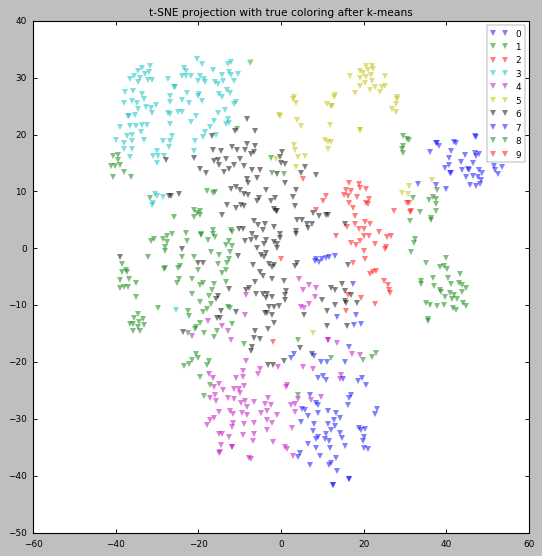

In [104]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = kmeans.labels_ == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('t-SNE projection with true coloring after k-means')
plt.show()

### t-SNE с другими метриками.

#### `Minkowsky` with  manhattan

In [80]:
from scipy.spatial import distance

In [81]:
def dis1(X, y):
    return distance.minkowski(X, y, p=1)

def disinf(X, y):
    return distance.minkowski(X, y, p=np.infty)

In [85]:
tsne1 = TSNE(n_components = 2, random_state=123, metric = dis1)
sne1_X = tsne1.fit_transform(imgs_train)

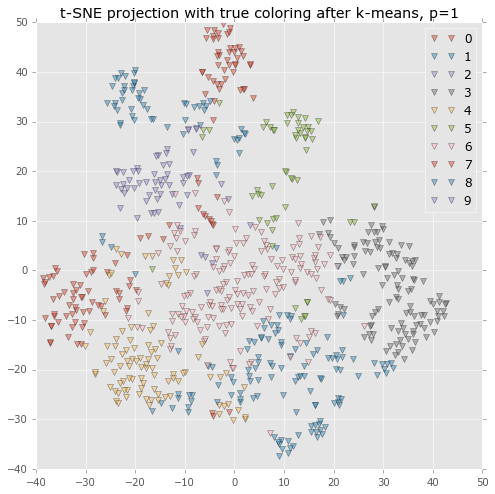

In [131]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = kmeans.labels_ == i
    plt.plot(sne1_X[bit_mask, 0], sne1_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('t-SNE projection with true coloring after k-means, p=1')
plt.show()

#### `Minkowsky` with  `np.infty`

In [90]:
tsneinf = TSNE(n_components = 2, random_state=123, metric = disinf)
sne_X_inf = tsneinf.fit_transform(imgs_train)

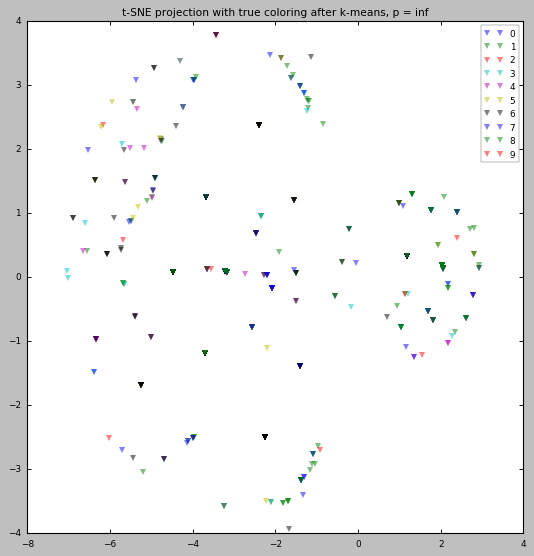

In [103]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = kmeans.labels_ == i
    plt.plot(sne_X_inf[bit_mask, 0], sne_X_inf[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('t-SNE projection with true coloring after k-means, p = inf')
plt.show()

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

__Ответы__:

* Без цветных меток лейблов, полученных после обучения с k-means (с 9 выделенными кластерами), различить что-то очень сложно. Как подсказывает гипотеза компактности, объекты, находящиеся рядом друг с другом с большой вероятностью принадлежат одному классу. 
* Мы видим на t-SNE, что объекты составляют группы с двумя метриками: евклидовой и манхенттен. С метрикой Чебышева визуально очень трудно уловить разбиение данных на кластеры, даже после обучения с k-means. 
* Вероятно, это связано с тем, что в иерархических данных важную роль играют именно фичи объекта, а не его принадлежность к тому или иному измерению. Наоборот, Чебышевская метрика рассчитывает самое большое расстояние между объектами разных измерений, а не между фичами объектов. А Манхеттен учитывает самых ближайших соседей по фичам. 
* Визуально (абстрагируясь от цветных меток) можно попробовать выделить 3 крупных кластера и несколько мелких. Это уже больше выделенных ранее двух кластеров ("резные" и "сглаженные" листы).

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их таблицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [30]:
from sklearn.cluster import KMeans

#### 9 clusters

In [31]:
kmeans = KMeans(n_clusters = 9, random_state = 0).fit(imgs_train)

In [32]:
centers = kmeans.cluster_centers_

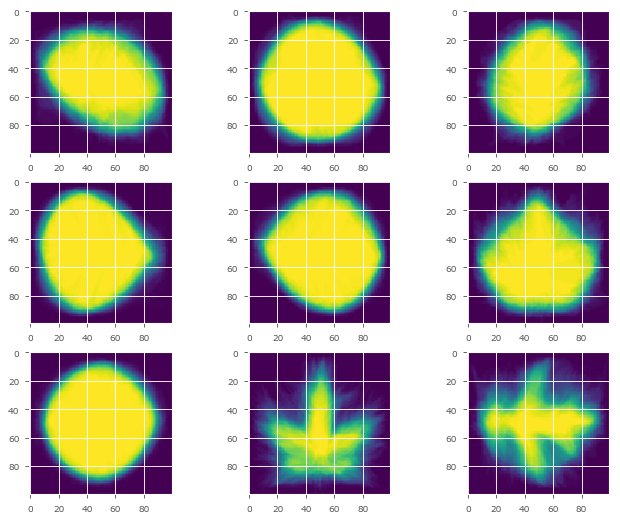

In [33]:
fig = plt.figure(figsize=(10, 8), dpi = 80)
for i in range(1, 10): 
    plt.subplot(3, 3, i)
    plt.imshow(np.reshape(centers[i-1,:], (100, 100)))

#### 25 clusters

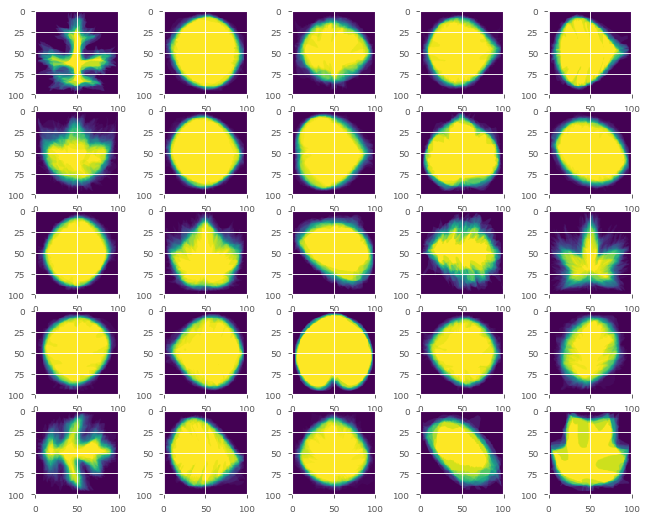

In [35]:
kmeans25 = KMeans(n_clusters = 25, random_state = 0).fit(imgs_train)
centers25 = kmeans25.cluster_centers_
fig = plt.figure(figsize=(10, 8), dpi = 80)
for i in range(1, 26): 
    plt.subplot(5, 5, i)
    plt.imshow(np.reshape(centers25[i-1,:], (100, 100)))

#### 100 clusters

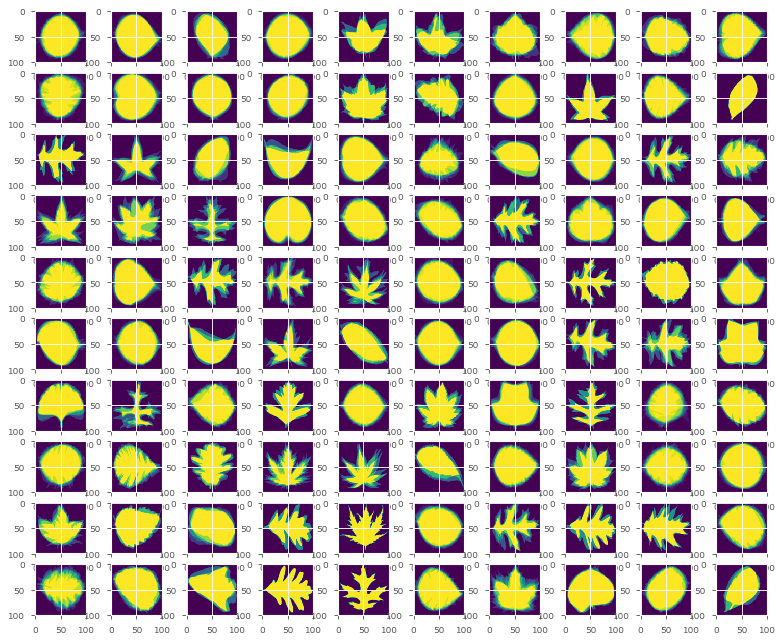

In [36]:
kmeans100 = KMeans(n_clusters = 100, random_state = 0).fit(imgs_train)
centers100 = kmeans100.cluster_centers_
fig = plt.figure(figsize=(12, 10), dpi = 80)
for i in range(1, 101): 
    plt.subplot(10, 10, i)
    plt.imshow(np.reshape(centers100[i-1,:], (100, 100)))

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

* Да, похожи. 
* Отличие в том, что центр i-го кластера показывает одновременно "средний" и "разбросочный" листы для i-го кластера. 
* Да, есть, те самые "сглаженные" листья. Нам они кажутся похожими, хотя в действительности (при разжатии картинок) они разные: более вытянутые как листья дуба или круглые как листья осины. 
* Лучше взять 9 кластеров. Визуализация обучения на большем количестве кластеров показывает явные признаки переобучения. Обучение на 9 кластерах, наоборот, хорошо схватывает и группирует основные фичи схожих листьев. 

Можем даже проверить эффективное количество классов с помощью метода Кетелла (график ниже). После 9-15 k (кластеров) фукнционал ($J(C_k)$) падает не особо быстро. Имеет смысл брать 9-15 кластеров. 

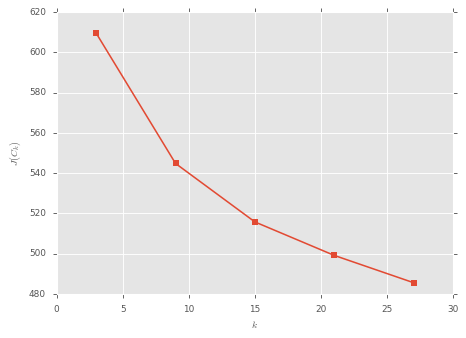

In [150]:
inertia = []
for k in range(3, 28, 6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(imgs_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 28, 6), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? В этом задании нужно использовать любой другой метод кластеризации, который поддерживает использование различных метрик.

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

/Users/herrhellana/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Воспользуемся иерархической кластеризацией. Возьмем метод агрегирования `complete` и метрику `minkowski` с параметрами `p=1`, `p=np.infty`.

In [54]:
link_complete = linkage(imgs_train, method = 'complete', metric=dis1)

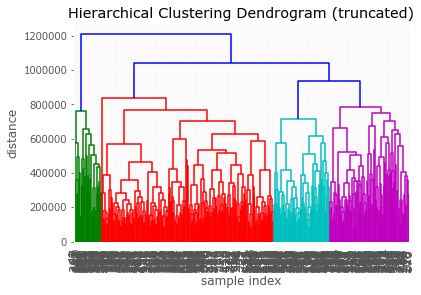

In [55]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    link_complete,
    truncate_mode='level',  # includes all nodes with p merges from the last merge
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [56]:
link_complete_inf = linkage(imgs_train, method = 'complete', metric=disinf)

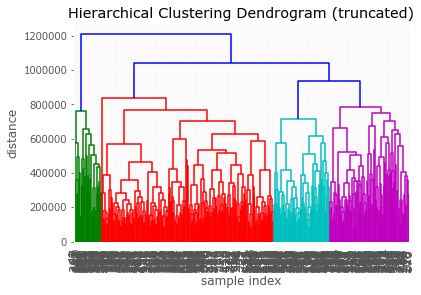

In [57]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    link_complete,
    truncate_mode='level',  # includes all nodes with p merges from the last merge
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Иерархическая кластеризация выделяет 4 крупных класса. В целом, если мы посмотрим на визуализацию обучения k-means с 9 кластерами, увидим, что есть действительно похожие кластеры (со "сглаженными" листьями). 

Посмотрим, как 4 кластера выделяет k-means:

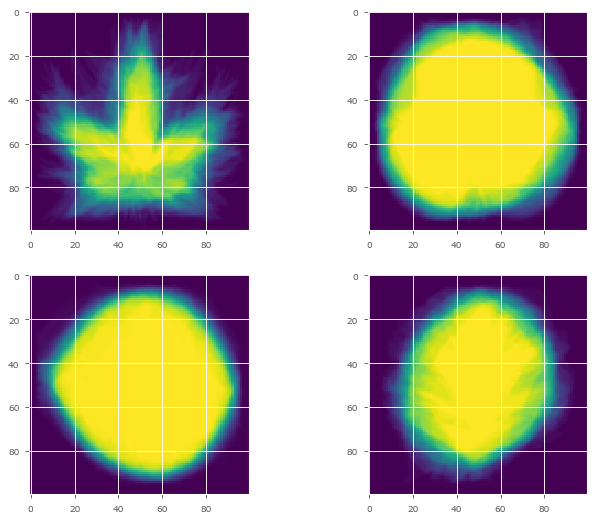

In [63]:
kmeans4 = KMeans(n_clusters = 4, random_state = 0).fit(imgs_train)
centers4 = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 8), dpi = 80)
for i in range(1, 5): 
    plt.subplot(2, 2, i)
    plt.imshow(np.reshape(centers4[i-1,:], (100, 100)))

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

### Centroid method

In [37]:
from sklearn.neighbors import NearestCentroid

In [38]:
random.seed(1234)
clf = NearestCentroid()
clf.fit(imgs_train, y_train)
#cetners  = kmeans.cluster_centers_

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [43]:
y_pred = clf.predict(imgs_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred)

0.010101010101010102

In [82]:
centers_clf = clf.centroids_

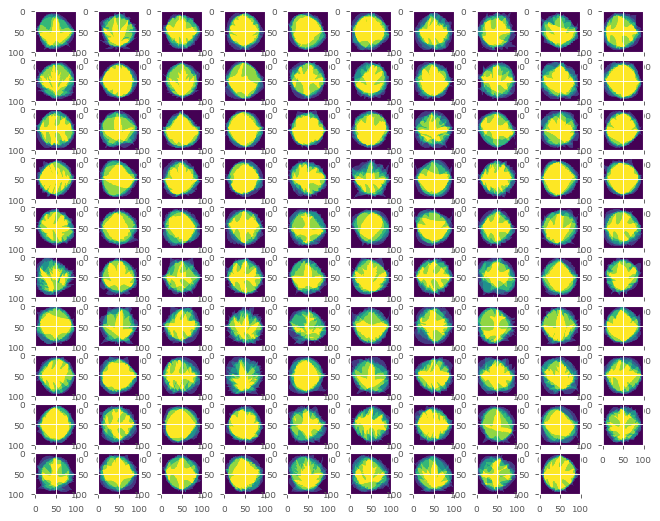

In [89]:
fig = plt.figure(figsize=(10, 8), dpi = 80)
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(np.reshape(centers_clf[i-1,:], (100, 100)))

### Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
bayes = MultinomialNB()
bayes.fit(imgs_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
y_pred_bayes = bayes.predict(imgs_test)

In [49]:
accuracy_score(y_test, y_pred_bayes)

0.015151515151515152

In [50]:
prob = bayes.feature_log_prob_

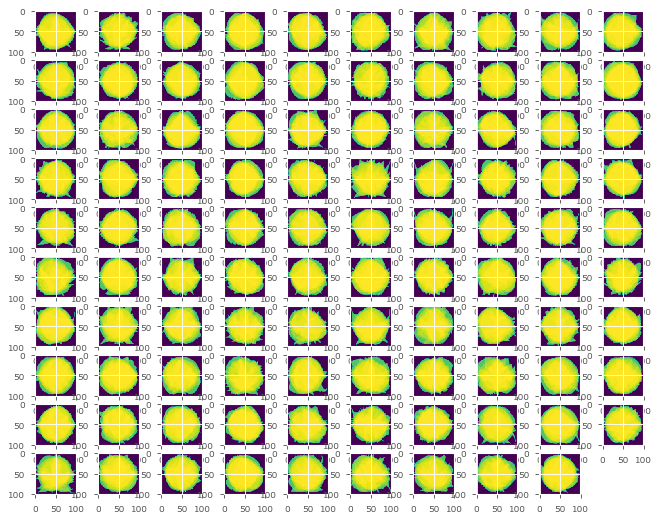

In [51]:
fig = plt.figure(figsize=(10, 8), dpi = 80)
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(np.reshape(prob[i-1,:], (100, 100)))

### Logit with regularization

In [59]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class = 'multinomial', C = .1, solver='newton-cg')

In [60]:
logisticRegr.fit(imgs_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred_logit = logisticRegr.predict(imgs_test)

In [136]:
accuracy_score(y_test, y_pred_logit)

0.010101010101010102

In [143]:
weights = logisticRegr.coef_

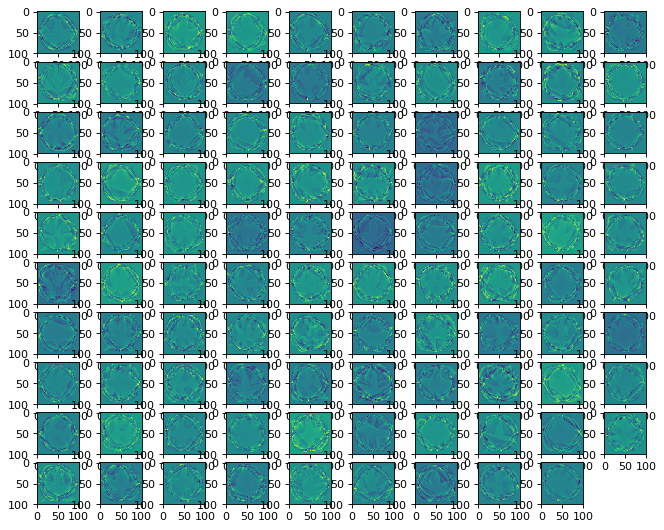

In [153]:
fig = plt.figure(figsize=(10, 8), dpi = 80)
plt.style.use('seaborn-deep')
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(np.reshape(weights[i-1,:], (100, 100)))

In [152]:
plt.rcParams.update(plt.rcParamsDefault)

P.S. Не понимаю, в какие-то моменты у меня летит `plt.style` и переключения между другими стилями ничего не дает. 

__WTF?__

In [154]:
accuracy_score(y_train, clf.predict(imgs_train))

0.23232323232323232

In [155]:
accuracy_score(y_train, bayes.predict(imgs_train))

0.39141414141414144

In [156]:
accuracy_score(y_train, logisticRegr.predict(imgs_train))

1.0

In [158]:
y_train.shape

(792,)

In [160]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

__Ответы__:
* Хуже всего работает логит, лучше -- байес. Но в целом все алгоритмы обучаются очень плохо на картинках, тем более, что размер обучающей выборки не особо большой (меньше 1000). Скорее всего это связано с тем, что эти алгоритмы плохо работают с пиксельными данными: запоминают значение пикселей, а не их взаимное расположение. 
* Центры кластеров представляют скорее дисперсию листов. На них хорошо видно, что алгоритм очень плохо обучился -- дисперсия очень высокая, адекватные очертания листов сложно выявить. 
* Визуализированные вероятности классов, полученные в наивном байесе, скорее походят на "средний" лист. 
* Веса из логита визуализируют прежде всего границы картинок. Скорее всего это связано с тем, что особенность границ листов (резные VS сглаженные) не только бинаризируема, но и является ключевым параметров для отличия листов друг от друга, то есть ключевой фичей. Логит ищет как раз такую фичу, по которой можно разбить на два класса (eg резной или сглаженный лист). 

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [106]:
from sklearn.ensemble import RandomForestClassifier

/Users/herrhellana/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [107]:
np.random.seed(123)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

rf.fit(imgs_train, y_train)
y_pred_rf = rf.predict(imgs_test)

In [109]:
feat = rf.feature_importances_

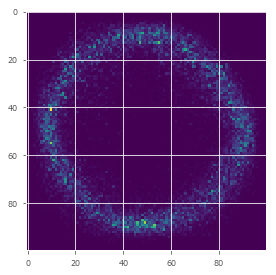

In [117]:
#fig = plt.figure(figsize=(10, 8), dpi = 80)
plt.imshow(np.reshape(feat, (100, 100)))

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

__Ответы__:
* Нет, не похожа. 
* В целом, да -- это границы листа, которые, как уже было упомянуто выше, являются скорее всего ключевой фичой. 
* Скорее всего помеченные как неважные участки картинки действительно не важны, так как далеко не все признаки встречаются часто в простой визуализации (только пиксели 0 и 255). 

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [22]:
num_components = 2**np.arange(10)

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [ ]:
from sklearn.feature_selection import SelectKBest

Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.